In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline


In [2]:
#importing the dataset
train_path = 'Data/train.csv'
test_path = 'Data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
#creating train and test image 
train_images = train_df.iloc[0:5000, 1:]
train_labels = train_df.iloc[0:5000, 0]

test_images = train_df.iloc[5001:6001, 1:]
test_labels = train_df.iloc[5001:6001, 0]

Text(0.5,1,'7')

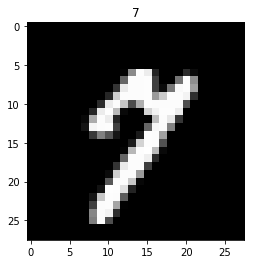

In [4]:
#checking out the shape of the images in train
i = 504
img = train_images.iloc[i].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap = 'gray')
plt.title(train_labels.iloc[i])

Text(0.5,1,'7')

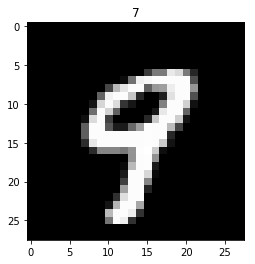

In [6]:
#checking out the shape of the images in test
i = 504
img = test_images.iloc[i].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap = 'gray')
plt.title(train_labels.iloc[i])

In [7]:
#fitting the model
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
#creating classification
clf.score(test_images, test_labels)

0.097000000000000003

In [10]:
#converting grayscale to black and white images
test_images[test_images > 0] = 1
train_images[train_images > 0] = 1

In [11]:
#re-run simulation
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.91300000000000003

In [12]:
test_df[test_df > 0] = 1
results = clf.predict(test_df[0:5000])

In [13]:
results

array([2, 0, 9, ..., 1, 7, 3], dtype=int64)

In [15]:
sub_df = pd.DataFrame(results)
sub_df.index.name = 'ImageId'
sub_df.index += 1
sub_df.columns = ['Label']
sub_df.to_csv('results.csv', header = True)